<a href="https://colab.research.google.com/github/sharmajee499/Churn_Analysis_CIS_630/blob/main/Project_CIS_630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
#Reading directly from the github url

df_raw = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

In [ ]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#EDA of the data

#Remove the 'customerID' column form the data
df_raw.drop(['customerID'], axis=1, inplace=True)

In [4]:
#Looking at the Data Types of the value
print(df_raw.info())

#Will change the 'TotalCharges' To Neumeric
df_raw.TotalCharges = pd.to_numeric(df_raw.TotalCharges, errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
#Null Values Findings
df_raw.isnull().sum()

#Total charges is missing 11 values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#Impute the missing value with the median
df_raw.fillna(value = df_raw.TotalCharges.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


There are 73.463 % NO and 26.537 % YES values


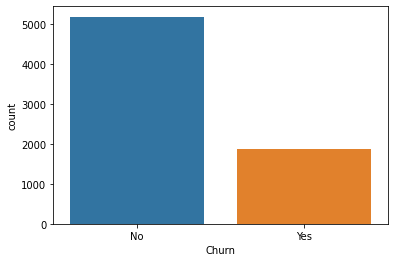

In [7]:
#How many people in the dataset are Churning? What's the ratio?
sns.countplot(df_raw.Churn)
print(f'There are {round(df_raw.Churn.value_counts()[0]/df_raw.Churn.count()*100, 3)} % NO and {round(df_raw.Churn.value_counts()[1]/df_raw.Churn.count()*100, 3)} % YES values')

#The dataset is imbalanced

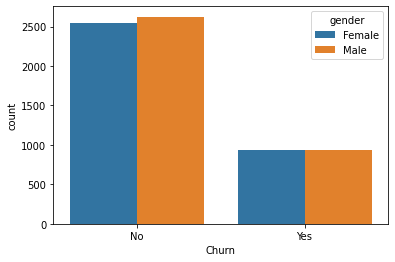

In [8]:
#Churning the Company based on the Gender
sns.countplot(x = 'Churn', hue = 'gender', data = df_raw)

#The number of male and female leaving the company are the same. 

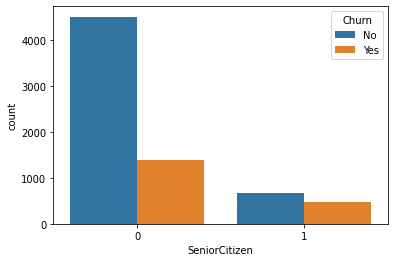

In [9]:
#Churn based on the Senior Citizens
sns.countplot(x= 'SeniorCitizen', hue='Churn', data = df_raw)

#People who are NOT Senior Citizen are less likely to Churn. 

## Converting to the Dummy Variable

In [10]:
df_dummy = pd.get_dummies(df_raw, 
                          columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                                  'Churn'],
                          drop_first=True)

#From here we will be using the 'df_dummy' data

## Train-Test Split

In [11]:
X = df_dummy.drop('Churn_Yes', axis=1)
y = df_dummy.Churn_Yes

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 112233, 
                                                    shuffle = True,
                                                    stratify = y)

## Balancing the Data (Over-Sampling with SMOTE)

In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=112233)

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [14]:
print(f'The class before the SMOTE {Counter(y_train)}')
print(f'The class after SMOTE {Counter(y_train_sm)}')

The class before the SMOTE Counter({0: 3622, 1: 1308})
The class after SMOTE Counter({0: 3622, 1: 3622})


## Modeling

### Explainable Boosting Machines

In [ ]:
#Explainable Boosting Machines
!pip install interpret

In [ ]:
#loading libraries
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show


ebm = ExplainableBoostingClassifier(random_state=11223344, n_jobs=-1)
ebm.fit(X_train_sm, y_train_sm)

In [60]:
#Explaination_of the model
set_visualize_provider(InlineProvider())
ebm_global = ebm.explain_global()
show(ebm_global)

ebm_local = ebm.explain_local(X_test[:10], y_test[:10])
ebm_local.visualize()

In [62]:
#Prediction of the testing data
pred_ebm = ebm.predict(X_test)

In [85]:
#Model Validation Metrices

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

def validation_metrices(y_truth, y_pred, classifier_obj):
  """
  y_truth --> This is your ground truth
  y_pred --> this is your predicted value in array
  classifier_obj --> This is your classifier object when you applied .fit()
  
  """
  # Confusion Matrix
  disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_ebm, 
                                                 labels=ebm.classes_, 
                                                 normalize="all")

  #Precision, reacall and accuracy
  prec = precision_score(y_truth, y_pred, labels=classifier_obj.classes_)
  recal = recall_score(y_truth, y_pred, labels=classifier_obj.classes_)
  accuracy = accuracy_score(y_truth, y_pred)

  print(f'The accuracy of the model is {round(accuracy,3)}, precision of the model is {round(prec,3)}, and the recall is {round(recal,3)}')

  #ROC- AUC Curve
  RocCurveDisplay.from_predictions(y_truth, y_pred)



The accuracy of the model is 0.758, precision of the model is 0.535, and the recall is 0.67


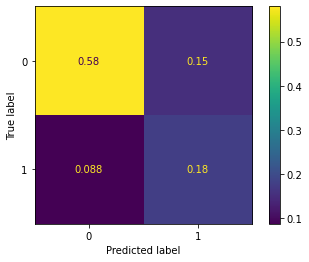

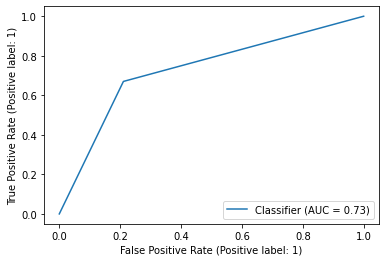

In [86]:
#Validation Score of the EBM Models
validation_metrices(y_test, pred_ebm, ebm)

## Auto-ML

In [ ]:
!pip install pycaret

In [90]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [106]:
import imp
import sklearn
imp.reload(sklearn)

<module 'sklearn' from '/usr/local/lib/python3.7/dist-packages/sklearn/__init__.py'>

In [107]:
!pip install scikit-learn==0.23.2

In [118]:
from pycaret.classification import *

In [ ]:
mod = pycaret.classification.setup(data = df_raw, target='Churn',session_id=123)